In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [3]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
#device = torch.device("cpu")
print(device)

cpu


In [13]:
save_dir='model_storage/General_Results'
save_dir_sep = 'model_storage/'
compare = ['GAT', 'SAGE']

In [5]:
from sklearn.metrics import confusion_matrix

In [7]:
Y_post = pd.read_csv(save_dir+'/preds.csv', sep='\t', index_col='Unnamed: 0')
Y_post

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Confidence,Agreement,Split
0,0.023308,0.092600,0.013124,0.008048,0.196725,0.106169,0.049425,0.006630,0.503971,0.073991,...,0.016723,0.110538,0.003947,0.002881,0.003196,0.003373,0.008975,0.640173,0.511985,3
1,0.007802,0.028861,0.005184,0.002837,0.035748,0.039839,0.007949,0.002255,0.869525,0.137170,...,0.012703,0.096044,0.004870,0.003663,0.003719,0.004303,0.009441,0.804773,0.758477,1
2,0.046474,0.078024,0.019920,0.013998,0.189559,0.294794,0.076289,0.013048,0.267894,0.152243,...,0.011432,0.131497,0.004096,0.003283,0.002871,0.003469,0.009972,0.541068,0.398835,3
3,0.039600,0.167872,0.037128,0.013169,0.010623,0.062525,0.611162,0.047346,0.010575,0.056670,...,0.021234,0.621870,0.009843,0.006424,0.004495,0.007312,0.009619,0.779347,0.699834,2
4,0.224977,0.389542,0.008062,0.058410,0.010918,0.248220,0.037936,0.010347,0.011587,0.188741,...,0.013952,0.359828,0.005026,0.003659,0.002521,0.003093,0.009433,0.613210,0.462161,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,0.021323,0.395644,0.141878,0.023077,0.005902,0.021139,0.320682,0.055967,0.014388,0.322753,...,0.018147,0.045551,0.005918,0.004739,0.004198,0.006988,0.011462,0.636219,0.484799,2
2947,0.007031,0.036870,0.279541,0.015145,0.003105,0.003098,0.569580,0.080729,0.004902,0.295648,...,0.017517,0.058423,0.005918,0.004885,0.004262,0.007980,0.011796,0.699740,0.596711,3
2948,0.066964,0.518670,0.059821,0.024642,0.014110,0.028481,0.230130,0.045167,0.012014,0.307637,...,0.021037,0.036960,0.006333,0.005501,0.004894,0.008167,0.011490,0.641245,0.524926,3
2949,0.292696,0.283671,0.057701,0.035209,0.014874,0.188822,0.078696,0.034312,0.014019,0.368661,...,0.013481,0.041714,0.004622,0.004239,0.003453,0.005919,0.012276,0.569789,0.437757,2


In [18]:
pred = torch.tensor(np.array(Y_post)).to(device)
pred.shape

torch.Size([2951, 23])

In [27]:
Y_post['HA'] = pred[:,:9].argmax(axis=1)
Y_post[['HV_1','HV_2','HV_3']] = pred[:,9:20].topk(3, axis=1)[1]

In [29]:
Y_post

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,Confidence,Agreement,Split,HA,HV_1,HV_2,HV_3
0,0.023308,0.092600,0.013124,0.008048,0.196725,0.106169,0.049425,0.006630,0.503971,0.073991,...,0.003196,0.003373,0.008975,0.640173,0.511985,3,8,1,3,2
1,0.007802,0.028861,0.005184,0.002837,0.035748,0.039839,0.007949,0.002255,0.869525,0.137170,...,0.003719,0.004303,0.009441,0.804773,0.758477,1,8,1,2,0
2,0.046474,0.078024,0.019920,0.013998,0.189559,0.294794,0.076289,0.013048,0.267894,0.152243,...,0.002871,0.003469,0.009972,0.541068,0.398835,3,5,1,2,3
3,0.039600,0.167872,0.037128,0.013169,0.010623,0.062525,0.611162,0.047346,0.010575,0.056670,...,0.004495,0.007312,0.009619,0.779347,0.699834,2,6,5,2,3
4,0.224977,0.389542,0.008062,0.058410,0.010918,0.248220,0.037936,0.010347,0.011587,0.188741,...,0.002521,0.003093,0.009433,0.613210,0.462161,2,1,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,0.021323,0.395644,0.141878,0.023077,0.005902,0.021139,0.320682,0.055967,0.014388,0.322753,...,0.004198,0.006988,0.011462,0.636219,0.484799,2,1,0,2,1
2947,0.007031,0.036870,0.279541,0.015145,0.003105,0.003098,0.569580,0.080729,0.004902,0.295648,...,0.004262,0.007980,0.011796,0.699740,0.596711,3,6,0,2,3
2948,0.066964,0.518670,0.059821,0.024642,0.014110,0.028481,0.230130,0.045167,0.012014,0.307637,...,0.004894,0.008167,0.011490,0.641245,0.524926,3,1,0,2,1
2949,0.292696,0.283671,0.057701,0.035209,0.014874,0.188822,0.078696,0.034312,0.014019,0.368661,...,0.003453,0.005919,0.012276,0.569789,0.437757,2,0,0,1,3


In [8]:
(Y_post['Confidence']+Y_post['Agreement']).describe()

count    2951.000000
mean        1.199809
std         0.252657
min         0.505432
25%         1.027311
50%         1.217104
75%         1.399544
max         1.745822
dtype: float64

In [9]:
pred = torch.tensor(np.array(Y_post[(Y_post['Confidence']+Y_post['Agreement'])>1.027311])).to(device)
pred.shape

torch.Size([2213, 23])

In [51]:
GAT_df = pd.read_csv(save_dir_sep+'GAT/Explanation/all_explain.csv', sep='\t', index_col=0).set_index(['ID'])
GAT_df = GAT_df.merge(Y_post[['Confidence','Agreement','Split','HA','HV_1','HV_2','HV_3']], 
                      left_index=True, right_index = True, how='left')
GAT_df

,1,2,3,4,5,6,7,8,9,10,...,1751,1752,1753,Confidence,Agreement,Split,HA,HV_1,HV_2,HV_3
ID,,,,,,,,,,,,,,,,,,,,,
1,0.196204,0.125538,0.829300,0.143392,0.785905,0.712615,0.207511,0.859502,0.163500,0.845775,...,0.837967,0.172734,0.165242,0.804773,0.758477,1,8,1,2,0
28,0.827174,0.194986,0.172719,0.177570,0.845929,0.147856,0.840769,0.864428,0.818672,0.171176,...,0.157639,0.222541,0.857266,0.790686,0.726263,1,6,3,5,2
30,0.691643,0.848522,0.114636,0.353214,0.160089,0.834555,0.150483,0.319174,0.185085,0.156366,...,0.247251,0.848224,0.201359,0.823369,0.767623,1,5,3,1,0
34,0.081797,0.831367,0.194305,0.812363,0.825632,0.812793,0.174359,0.155627,0.843013,0.166483,...,0.144122,0.828859,0.158463,0.829854,0.758386,1,0,0,5,2
35,0.111419,0.843864,0.198652,0.799678,0.837694,0.840953,0.154347,0.174330,0.853294,0.165892,...,0.139210,0.132350,0.845993,0.785706,0.720584,1,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,0.159106,0.157753,0.809235,0.825924,0.159197,0.699754,0.208735,0.274189,0.154435,0.854217,...,0.157798,0.112518,0.194006,0.568695,0.541123,3,1,5,2,3
2940,0.754659,0.843647,0.196224,0.774877,0.152437,0.838377,0.161009,0.186751,0.170174,0.166632,...,0.153524,0.173947,0.164563,0.597287,0.566329,3,5,3,5,2
2944,0.129716,0.165112,0.354632,0.162761,0.140983,0.779570,0.120060,0.146458,0.752690,0.889203,...,0.115095,0.838183,0.152334,0.611044,0.485773,3,6,0,1,2


In [52]:
SAGE_df = pd.read_csv(save_dir_sep+'SAGE/Explanation/all_explain.csv', sep='\t', index_col=0).set_index(['ID'])
SAGE_df = SAGE_df.merge(Y_post[['Confidence','Agreement','Split','HA','HV_1','HV_2','HV_3']], 
                      left_index=True, right_index = True, how='left')
SAGE_df

,1,2,3,4,5,6,7,8,9,10,...,1751,1752,1753,Confidence,Agreement,Split,HA,HV_1,HV_2,HV_3
ID,,,,,,,,,,,,,,,,,,,,,
1,0.191380,0.070536,0.890955,0.154555,0.667271,0.859189,0.577962,0.842605,0.131733,0.863964,...,0.847712,0.870059,0.123290,0.804773,0.758477,1,8,1,2,0
28,0.916585,0.142908,0.815150,0.144299,0.852302,0.131787,0.852444,0.827218,0.877387,0.762251,...,0.683977,0.173271,0.110680,0.790686,0.726263,1,6,3,5,2
30,0.656934,0.874703,0.897564,0.831839,0.611965,0.835433,0.857550,0.892003,0.152759,0.896251,...,0.818267,0.900504,0.134084,0.823369,0.767623,1,5,3,1,0
34,0.878631,0.839939,0.815494,0.835174,0.871223,0.849590,0.179989,0.816892,0.848545,0.195033,...,0.880519,0.817320,0.146757,0.829854,0.758386,1,0,0,5,2
35,0.899845,0.808518,0.853702,0.832495,0.859872,0.842544,0.886377,0.794908,0.848853,0.767066,...,0.897768,0.191089,0.809527,0.785706,0.720584,1,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,0.172773,0.132829,0.858535,0.839368,0.879682,0.792292,0.734532,0.803669,0.834399,0.866355,...,0.136764,0.265421,0.111996,0.568695,0.541123,3,1,5,2,3
2940,0.853294,0.822491,0.888527,0.233365,0.865722,0.839907,0.852623,0.888329,0.229653,0.794968,...,0.872952,0.896432,0.108591,0.597287,0.566329,3,5,3,5,2
2944,0.849596,0.115164,0.850300,0.150556,0.840395,0.158579,0.844938,0.839588,0.517085,0.632333,...,0.132697,0.839593,0.161466,0.611044,0.485773,3,6,0,1,2


In [329]:
exp_GAT_n = torch.tensor(np.array(GAT_df)[:,:1753]).topk(250)[1].to(device)

In [386]:
exp_SAGE_n = torch.tensor(np.array(SAGE_df)[:,:1753]).topk(250)[1].to(device)

In [330]:
exp_GAT_logic = sum(exp_GAT_n==i for i in cand_list).bool()

In [387]:
exp_SAGE_logic = sum(exp_SAGE_n==i for i in cand_list).bool()

In [647]:
exp_GAT_v = torch.tensor(np.array(GAT_df)[:,:1753]).topk(250)[0].to(device)[:,-1]
exp_GAT_v

tensor([0.8472, 0.8480, 0.8399,  ..., 0.8516, 0.8483, 0.8442],
       dtype=torch.float64)

In [630]:
exp_GAT_n.flatten().shape

torch.Size([437750])

In [632]:
exp_GAT_v.flatten().shape

torch.Size([437750])

In [615]:
exp_GAT_v.mean(),exp_GAT_v.std()

(tensor(0.7665, dtype=torch.float64), tensor(0.1643, dtype=torch.float64))

In [648]:
exp_SAGE_v = torch.tensor(np.array(SAGE_df)[:,:1753]).topk(250)[0].to(device)[:,-1]
exp_SAGE_v

tensor([0.8588, 0.8496, 0.8664,  ..., 0.8470, 0.8504, 0.8443],
       dtype=torch.float64)

In [616]:
exp_SAGE_v.mean(),exp_SAGE_v.std()

(tensor(0.8534, dtype=torch.float64), tensor(0.0129, dtype=torch.float64))

In [604]:
v_250 = torch.hstack([exp_GAT_v,exp_SAGE_v])

In [606]:
v_250.mean(), v_250.std()

(tensor(0.8099, dtype=torch.float64), tensor(0.1244, dtype=torch.float64))

In [567]:
exp_GAT_value = torch.tensor(np.array(GAT_df)[:,:1753]).to(device)
exp_GAT_value 

tensor([[0.1962, 0.1255, 0.8293,  ..., 0.8380, 0.1727, 0.1652],
        [0.8272, 0.1950, 0.1727,  ..., 0.1576, 0.2225, 0.8573],
        [0.6916, 0.8485, 0.1146,  ..., 0.2473, 0.8482, 0.2014],
        ...,
        [0.1297, 0.1651, 0.3546,  ..., 0.1151, 0.8382, 0.1523],
        [0.8511, 0.1996, 0.2038,  ..., 0.1436, 0.8261, 0.1567],
        [0.1479, 0.1513, 0.8333,  ..., 0.1797, 0.8665, 0.1595]],
       dtype=torch.float64)

In [569]:
exp_SAGE_value = torch.tensor(np.array(SAGE_df)[:,:1753]).to(device)
exp_SAGE_value 

tensor([[0.1914, 0.0705, 0.8910,  ..., 0.8477, 0.8701, 0.1233],
        [0.9166, 0.1429, 0.8151,  ..., 0.6840, 0.1733, 0.1107],
        [0.6569, 0.8747, 0.8976,  ..., 0.8183, 0.9005, 0.1341],
        ...,
        [0.8496, 0.1152, 0.8503,  ..., 0.1327, 0.8396, 0.1615],
        [0.8461, 0.1535, 0.8606,  ..., 0.1297, 0.8296, 0.1540],
        [0.8414, 0.1575, 0.8945,  ..., 0.1320, 0.8319, 0.1034]],
       dtype=torch.float64)

In [572]:
values = torch.vstack([exp_GAT_value, exp_SAGE_value])
values.shape

torch.Size([3502, 1753])

In [574]:
values.max(dim=0)[0]

tensor([0.9226, 0.9056, 0.9200,  ..., 0.9228, 0.9295, 0.8976],
       dtype=torch.float64)

In [575]:
values.min(dim=0)[0]

tensor([0.0818, 0.0705, 0.0967,  ..., 0.0777, 0.0701, 0.0781],
       dtype=torch.float64)

In [579]:
values.quantile(q=0.75,dim=0)

tensor([0.8327, 0.8190, 0.8629,  ..., 0.8480, 0.8524, 0.1745],
       dtype=torch.float64)

<AxesSubplot: >

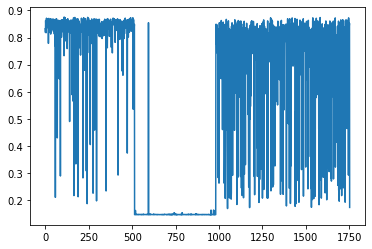

In [581]:
pd.Series(values.quantile(q=0.75,dim=0)).plot()

In [591]:
np.array(values.quantile(q=i/10,dim=0)).shape

(1753,)

In [594]:
values.shape

torch.Size([3502, 1753])

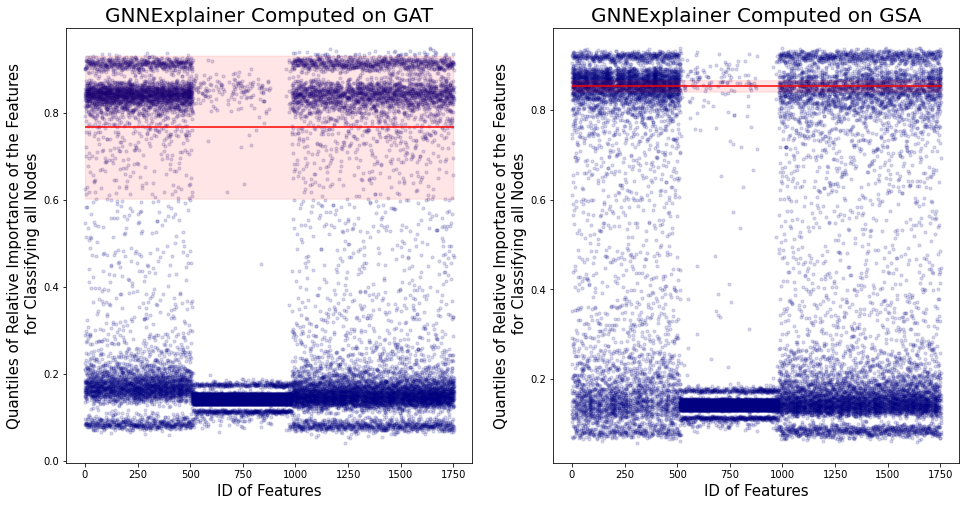

In [652]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

for i in range(11):
    axes[0].scatter(np.arange(values.shape[1]),np.array(exp_GAT_value.quantile(q=(i)/10,dim=0)), color='navy', alpha=.15, s=10, marker='o')
    axes[1].scatter(np.arange(len(exp_SAGE_value[i])),np.array(exp_SAGE_value.quantile(q=(i)/10,dim=0)), color='navy', alpha=.15, s=10, marker='o')

axes[0].hlines(exp_GAT_v.mean(), 0,  len(exp_GAT_v), color='red')
axes[0].fill_between(np.arange(len(exp_GAT_v)),
                       exp_GAT_v.mean()-exp_GAT_v.std(), 
                       exp_GAT_v.mean()+exp_GAT_v.std(), color='red', alpha=0.1)

axes[1].hlines(exp_SAGE_v.mean(), 0,  len(exp_SAGE_v), color='red')
axes[1].fill_between(np.arange(len(exp_GAT_v)),
                       exp_SAGE_v.mean()-exp_SAGE_v.std(), 
                       exp_SAGE_v.mean()+exp_SAGE_v.std(), color='red', alpha=0.1)

comp = ['GAT', 'GSA']

for i in range(2):
    axes[i].set_xlabel('ID of Features', size = 15)
    axes[i].set_ylabel('Quantiles of Relative Importance of the Features\n for Classifying all Nodes', size = 15)
    axes[i].set_title('GNNExplainer Computed on '+comp[i], size=20)

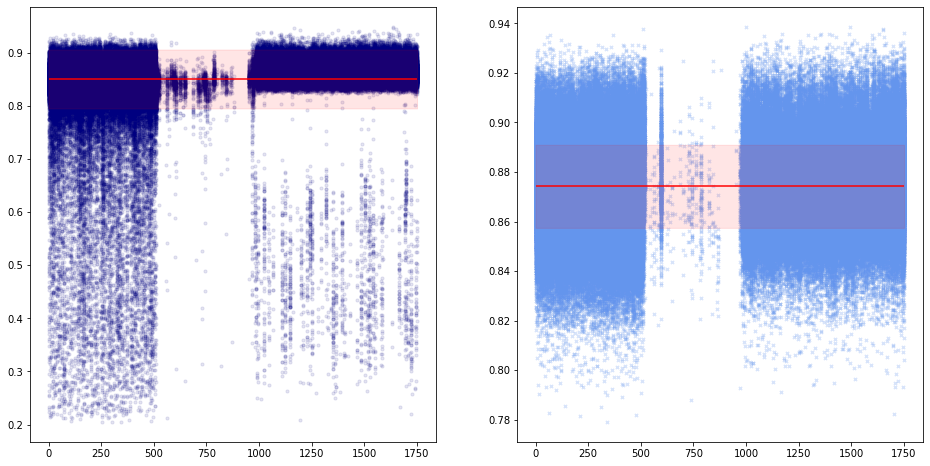

In [646]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

axes[0].scatter(np.array(exp_GAT_n.flatten()),np.array(exp_GAT_v.flatten()), color='navy', alpha=.1, s=10, marker='o')
axes[1].scatter(np.array(exp_SAGE_n.flatten()),np.array(exp_SAGE_v.flatten()), color='cornflowerblue', alpha=.25, s=10, marker='x')

axes[0].hlines(exp_GAT_v.mean(), 0,  len(exp_GAT_v), color='red')
axes[0].fill_between(np.arange(len(exp_GAT_v)),
                       exp_GAT_v.mean()-exp_GAT_v.std(), 
                       exp_GAT_v.mean()+exp_GAT_v.std(), color='red', alpha=0.1)

axes[1].hlines(exp_SAGE_v.mean(), 0,  len(exp_SAGE_v), color='red')
axes[1].fill_between(np.arange(len(exp_GAT_v)),
                       exp_SAGE_v.mean()-exp_SAGE_v.std(), 
                       exp_SAGE_v.mean()+exp_SAGE_v.std(), color='red', alpha=0.1)

In [588]:
len(exp_GAT_n[exp_GAT_logic])

3397

In [412]:
len(exp_SAGE_n[exp_SAGE_logic])

4346

In [488]:
len(exp_GAT_n[exp_GAT_logic])+len(exp_SAGE_n[exp_SAGE_logic])

7743

In [415]:
pos_case_GAT = (exp_GAT_logic.sum(dim=1)>0)
pos_case_GAT

tensor([False,  True,  True,  ..., False, False,  True])

In [416]:
pos_case_SAGE = (exp_SAGE_logic.sum(dim=1)>0)
pos_case_SAGE

tensor([ True,  True,  True,  ..., False, False, False])

In [417]:
pos_HA_GAT = torch.tensor(np.array(GAT_df['HA']))[pos_case_GAT]
pos_HA_SAGE = torch.tensor(np.array(SAGE_df['HA']))[pos_case_SAGE]

In [503]:
pos_HV_GAT = torch.tensor(np.array(GAT_df['HV_1']))[pos_case_GAT]
pos_HV_SAGE = torch.tensor(np.array(SAGE_df['HV_1']))[pos_case_SAGE]

In [342]:
exp_GAT_n[pos_case]

tensor([[  15,   37, 1169,  ..., 1492,  505,   39],
        [1733, 1121, 1111,  ...,  269,  445, 1143],
        [1592, 1158, 1014,  ...,  193, 1448,  210],
        ...,
        [ 238,  303,  393,  ...,  307,   80,  476],
        [ 323,  223,  478,  ...,  112,  340, 1694],
        [1076, 1591, 1640,  ..., 1053, 1245,  459]])

In [426]:
GAT_dic = {}
for i in range(pos_case_GAT.sum()):
    temp = exp_GAT_n[pos_case_GAT][i,:]
    temp_logic = sum(temp==i for i in cand_list).bool()
    
    for j in temp[temp_logic]:
        if j.item() not in GAT_dic:
            GAT_dic[j.item()] = {}
        if pos_HA[i].item() not in GAT_dic[j.item()]:
            GAT_dic[j.item()][pos_HA[i].item()] = 1
        else:
            GAT_dic[j.item()][pos_HA[i].item()] += 1

In [485]:
#SAGE_dic = {}
for i in range(pos_case_SAGE.sum()):
    temp = exp_SAGE_n[pos_case_SAGE][i,:]
    temp_logic = sum(temp==i for i in cand_list).bool()
    
    for j in temp[temp_logic]:
        if j.item() not in GAT_dic:
            GAT_dic[j.item()] = {}
        if pos_HA_SAGE[i].item() not in GAT_dic[j.item()]:
            GAT_dic[j.item()][pos_HA_SAGE[i].item()] = 1
        else:
            GAT_dic[j.item()][pos_HA_SAGE[i].item()] += 1

In [513]:
GAT_HV_dic = {}
for i in range(pos_case_GAT.sum()):
    temp = exp_GAT_n[pos_case_GAT][i,:]
    temp_logic = sum(temp==i for i in cand_list).bool()
    
    for j in temp[temp_logic]:
        if j.item() not in GAT_HV_dic:
            GAT_HV_dic[j.item()] = {}
        if pos_HV_GAT[i].item() not in GAT_HV_dic[j.item()]:
            GAT_HV_dic[j.item()][pos_HV_GAT[i].item()] = 1
        else:
            GAT_HV_dic[j.item()][pos_HV_GAT[i].item()] += 1

In [514]:
#SAGE_dic = {}
for i in range(pos_case_SAGE.sum()):
    temp = exp_SAGE_n[pos_case_SAGE][i,:]
    temp_logic = sum(temp==i for i in cand_list).bool()
    
    for j in temp[temp_logic]:
        if j.item() not in GAT_HV_dic:
            GAT_HV_dic[j.item()] = {}
        if pos_HV_SAGE[i].item() not in GAT_HV_dic[j.item()]:
            GAT_HV_dic[j.item()][pos_HV_SAGE[i].item()] = 1
        else:
            GAT_HV_dic[j.item()][pos_HV_SAGE[i].item()] += 1

In [408]:
len([a in dic0 for a in list(GAT_dic.keys())])

124

In [448]:
dic0

{512: 'FACE_Number',
 513: 'FACE_Confidence',
 514: 'FACE_Proportion',
 515: 'SCE_airfield',
 516: 'SCE_airplane_cabin',
 517: 'SCE_airport_terminal',
 518: 'SCE_alcove',
 519: 'SCE_alley',
 520: 'SCE_amphitheater',
 521: 'SCE_amusement_arcade',
 522: 'SCE_amusement_park',
 523: 'SCE_apartment_building',
 524: 'SCE_aquarium',
 525: 'SCE_aqueduct',
 526: 'SCE_arcade',
 527: 'SCE_arch',
 528: 'SCE_archaelogical_excavation',
 529: 'SCE_archive',
 530: 'SCE_arena',
 531: 'SCE_arena',
 532: 'SCE_arena',
 533: 'SCE_army_base',
 534: 'SCE_art_gallery',
 535: 'SCE_art_school',
 536: 'SCE_art_studio',
 537: 'SCE_artists_loft',
 538: 'SCE_assembly_line',
 539: 'SCE_athletic_field',
 540: 'SCE_atrium',
 541: 'SCE_attic',
 542: 'SCE_auditorium',
 543: 'SCE_auto_factory',
 544: 'SCE_auto_showroom',
 545: 'SCE_badlands',
 546: 'SCE_bakery',
 547: 'SCE_balcony',
 548: 'SCE_balcony',
 549: 'SCE_ball_pit',
 550: 'SCE_ballroom',
 551: 'SCE_bamboo_forest',
 552: 'SCE_bank_vault',
 553: 'SCE_banquet_hall'

In [486]:
HA_re = {dic0[k]:{dic_HA[i]: v[i] for i in v} for k,v in GAT_dic.items()}

In [520]:
HV_re = {dic0[k]:{dic_HV[i]: v[i] for i in v} for k,v in GAT_HV_dic.items()}

In [494]:
GAT_dic

{1752: {6: 33, 0: 37, 4: 14, 7: 4, 1: 1, 5: 1},
 1751: {5: 332, 1: 274, 6: 102, 0: 107, 8: 20, 2: 19, 4: 27, 3: 45},
 968: {0: 71, 5: 99, 3: 1, 1: 1},
 842: {0: 54, 5: 6},
 745: {5: 83, 1: 4, 0: 5, 4: 2, 8: 2},
 954: {1: 177, 8: 4, 0: 1, 4: 5, 6: 1, 5: 1},
 526: {1: 31, 5: 3},
 1750: {2: 3, 0: 211, 8: 19, 6: 80, 4: 220, 5: 199, 3: 69, 1: 26, 7: 1},
 629: {2: 13},
 518: {0: 59, 6: 1, 3: 1},
 605: {3: 26, 0: 23, 6: 2, 7: 2},
 584: {1: 5, 0: 59, 3: 10},
 770: {1: 1},
 606: {5: 70, 1: 1},
 788: {1: 91, 4: 54, 6: 30},
 969: {1: 180, 8: 8, 4: 164, 5: 1},
 564: {4: 34, 6: 12, 5: 1, 1: 1, 8: 8},
 973: {6: 68, 3: 38, 7: 4, 2: 15, 0: 1},
 826: {6: 2},
 512: {6: 57, 1: 200, 4: 138, 7: 2, 5: 263, 8: 23, 2: 14, 3: 34, 0: 87},
 733: {1: 59, 6: 3, 5: 1, 4: 2},
 528: {0: 12},
 594: {6: 48, 1: 440, 4: 107, 5: 242, 8: 12, 0: 141, 3: 12, 2: 1},
 552: {0: 9},
 971: {3: 25, 6: 5, 2: 1},
 546: {2: 16},
 513: {6: 51, 7: 2, 5: 285, 8: 23, 2: 14, 3: 20, 0: 110, 1: 203, 4: 158},
 863: {8: 13},
 823: {8: 21, 1: 

In [515]:
GAT_HV_dic

{1752: {3: 15, 1: 9, 5: 29, 2: 14, 0: 21, 9: 2},
 1751: {3: 158, 0: 210, 1: 117, 2: 239, 5: 202},
 968: {0: 21, 5: 55, 2: 63, 3: 26, 1: 7},
 842: {0: 13, 3: 13, 5: 5, 2: 26, 1: 3},
 745: {1: 8, 5: 33, 0: 6, 2: 32, 3: 17},
 954: {2: 119, 3: 9, 0: 16, 5: 37, 1: 8},
 526: {3: 3, 2: 8, 1: 6, 0: 8, 5: 9},
 1750: {3: 98, 5: 216, 0: 208, 2: 217, 1: 87, 9: 1, 6: 1},
 629: {3: 3, 2: 9, 5: 1},
 518: {5: 7, 3: 7, 0: 8, 1: 4, 2: 35},
 605: {2: 32, 1: 3, 0: 8, 5: 6, 3: 4},
 584: {3: 7, 5: 12, 2: 34, 0: 15, 1: 6},
 770: {3: 1},
 606: {2: 23, 1: 1, 5: 26, 0: 3, 3: 18},
 788: {0: 13, 3: 7, 5: 71, 2: 76, 1: 8},
 969: {0: 33, 5: 113, 3: 19, 2: 157, 1: 30, 6: 1},
 564: {1: 2, 5: 28, 3: 3, 2: 17, 0: 6},
 973: {1: 25, 5: 20, 0: 26, 3: 12, 2: 43},
 826: {1: 1, 0: 1},
 512: {1: 74, 5: 220, 2: 255, 0: 174, 3: 94, 6: 1},
 733: {3: 3, 2: 54, 0: 1, 5: 5, 1: 2},
 528: {5: 3, 2: 7, 0: 1, 3: 1},
 594: {5: 240, 3: 131, 2: 381, 0: 158, 1: 93},
 552: {5: 3, 1: 3, 0: 3},
 971: {0: 7, 1: 2, 3: 1, 5: 6, 2: 15},
 546: {2:

In [498]:
HA_links = pd.DataFrame([(i,j,GAT_dic[i][j]) for i in GAT_dic for j in GAT_dic[i]], columns=['source','target','weight'])

In [499]:
HA_links

,source,target,weight
0,1752,6,33
1,1752,0,37
2,1752,4,14
3,1752,7,4
4,1752,1,1
...,...,...,...
263,834,1,1
264,716,0,1
265,604,7,1
266,585,6,2


In [559]:
HV_links = pd.DataFrame([(i,j+10,GAT_HV_dic[i][j]) for i in GAT_HV_dic for j in GAT_HV_dic[i]], columns=['source','target','weight'])

In [560]:
HV_links

,source,target,weight
0,1752,13,15
1,1752,11,9
2,1752,15,29
3,1752,12,14
4,1752,10,21
...,...,...,...
399,716,12,1
400,604,19,1
401,585,15,1
402,585,12,1


In [561]:
link_table = pd.concat([HA_links,HV_links])
link_table

,source,target,weight
0,1752,6,33
1,1752,0,37
2,1752,4,14
3,1752,7,4
4,1752,1,1
...,...,...,...
399,716,12,1
400,604,19,1
401,585,15,1
402,585,12,1


In [562]:
HV_dif = pd.Series(dic_HV).reset_index()
HV_dif['index'] = HV_dif['index']+10
HV_dif

,index,0
0,10,Criterion i
1,11,Criterion ii
2,12,Criterion iii
3,13,Criterion iv
4,14,Criterion v
5,15,Criterion vi
6,16,Criterion vii
7,17,Criterion viii
8,18,Criterion ix
9,19,Criterion x


In [563]:
Node_table = pd.concat([pd.Series(dic_HA).reset_index(),HV_dif,pd.Series(dic0).reset_index()]).rename(columns={0:'Label', 'index':'Id'})
Node_table['Label'] = Node_table['Label'].apply(lambda x: x.replace('_',' '))
Node_table

,Id,Label
0,0,Building Elements
1,1,Urban Form Elements
2,2,Gastronomy
3,3,Interior Scenery
4,4,Natural Features and Landscape Scenery
...,...,...
468,980,SUN soothing
469,981,SUN stressful
470,1750,LANG English
471,1751,LANG Local


In [564]:
link_table.to_csv(save_dir+'/link_table.csv',sep='\t',index=False)
Node_table.to_csv(save_dir+'/Node_table.csv',sep='\t',index=False)

In [489]:
HA_re

{'LANG_Other': {'Peoples Activity and Association': 33,
  'Building Elements': 37,
  'Natural Features and Landscape Scenery': 14,
  'Artifact Products': 4,
  'Urban Form Elements': 1,
  'Monuments and Buildings': 1},
 'LANG_Local': {'Monuments and Buildings': 332,
  'Urban Form Elements': 274,
  'Peoples Activity and Association': 102,
  'Building Elements': 107,
  'Urban Scenery': 20,
  'Gastronomy': 19,
  'Natural Features and Landscape Scenery': 27,
  'Interior Scenery': 45},
 'SUN_man-made': {'Building Elements': 71,
  'Monuments and Buildings': 99,
  'Interior Scenery': 1,
  'Urban Form Elements': 1},
 'SCE_synagogueoutdoor': {'Building Elements': 54,
  'Monuments and Buildings': 6},
 'SCE_mosqueoutdoor': {'Monuments and Buildings': 83,
  'Urban Form Elements': 4,
  'Building Elements': 5,
  'Natural Features and Landscape Scenery': 2,
  'Urban Scenery': 2},
 'SUN_natural light': {'Urban Form Elements': 177,
  'Urban Scenery': 4,
  'Building Elements': 1,
  'Natural Features and 

In [521]:
HV_re

{'LANG_Other': {'Criterion iv': 15,
  'Criterion ii': 9,
  'Criterion vi': 29,
  'Criterion iii': 14,
  'Criterion i': 21,
  'Criterion x': 2},
 'LANG_Local': {'Criterion iv': 158,
  'Criterion i': 210,
  'Criterion ii': 117,
  'Criterion iii': 239,
  'Criterion vi': 202},
 'SUN_man-made': {'Criterion i': 21,
  'Criterion vi': 55,
  'Criterion iii': 63,
  'Criterion iv': 26,
  'Criterion ii': 7},
 'SCE_synagogueoutdoor': {'Criterion i': 13,
  'Criterion iv': 13,
  'Criterion vi': 5,
  'Criterion iii': 26,
  'Criterion ii': 3},
 'SCE_mosqueoutdoor': {'Criterion ii': 8,
  'Criterion vi': 33,
  'Criterion i': 6,
  'Criterion iii': 32,
  'Criterion iv': 17},
 'SUN_natural light': {'Criterion iii': 119,
  'Criterion iv': 9,
  'Criterion i': 16,
  'Criterion vi': 37,
  'Criterion ii': 8},
 'SCE_arcade': {'Criterion iv': 3,
  'Criterion iii': 8,
  'Criterion ii': 6,
  'Criterion i': 8,
  'Criterion vi': 9},
 'LANG_English': {'Criterion iv': 98,
  'Criterion vi': 216,
  'Criterion i': 208,
  '

In [493]:
pd.DataFrame(HA_re)

,LANG_Other,LANG_Local,SUN_man-made,SCE_synagogueoutdoor,SCE_mosqueoutdoor,SUN_natural light,SCE_arcade,LANG_English,SCE_delicatessen,SCE_alcove,...,SCE_art_school,SCE_train_interior,SCE_artists_loft,SCE_florist_shopindoor,SCE_cemetery,SCE_street,SCE_kenneloutdoor,SCE_childs_room,SCE_bus_interior,SUN_boating
Peoples Activity and Association,33.0,102.0,NaN,NaN,NaN,1.0,NaN,80,NaN,1.0,...,1.0,5.0,2.0,NaN,NaN,3.0,NaN,NaN,2.0,1.0
Building Elements,37.0,107.0,71.0,54.0,5.0,1.0,NaN,211,NaN,59.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
Natural Features and Landscape Scenery,14.0,27.0,NaN,NaN,2.0,5.0,NaN,220,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artifact Products,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Urban Form Elements,1.0,274.0,1.0,NaN,4.0,177.0,31.0,26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Monuments and Buildings,1.0,332.0,99.0,6.0,83.0,1.0,3.0,199,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Urban Scenery,NaN,20.0,NaN,NaN,2.0,4.0,NaN,19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gastronomy,NaN,19.0,NaN,NaN,NaN,NaN,NaN,3,13.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
Interior Scenery,NaN,45.0,1.0,NaN,NaN,NaN,NaN,69,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [492]:
len(pd.Series(list(GAT_dic.keys())).unique())

124

In [481]:
len(pd.Series(list(GAT_dic.keys())).apply(lambda x: dic0[x]).unique())

119

In [491]:
len(SAGE_dic)

81

In [490]:
len(HA_re)

124

In [487]:
np.array([GAT_dic[i][j] for i in GAT_dic for j in GAT_dic[i]]).sum()

7743

In [524]:
np.array([GAT_HV_dic[i][j] for i in GAT_HV_dic for j in GAT_HV_dic[i]]).sum()

7743

In [484]:
np.array([SAGE_dic[i][j] for i in SAGE_dic for j in SAGE_dic[i]]).sum()

4346

In [55]:
GAT_df.groupby('HA').mean()

,1,2,3,4,5,6,7,8,9,10,...,1750,1751,1752,1753,Confidence,Agreement,Split,HV_1,HV_2,HV_3
HA,,,,,,,,,,,,,,,,,,,,,
0,0.169251,0.778376,0.256671,0.754621,0.761346,0.741114,0.205858,0.202478,0.799934,0.246943,...,0.314013,0.356084,0.523138,0.314749,0.713540,0.647783,2.115672,1.854478,2.369403,2.466418
1,0.178618,0.192740,0.776807,0.793364,0.218743,0.513270,0.301822,0.610744,0.210411,0.827773,...,0.408651,0.198699,0.421747,0.183195,0.701316,0.653285,2.197938,2.276289,2.729897,2.804124
2,0.188625,0.224517,0.795695,0.159514,0.416605,0.190485,0.173221,0.793181,0.161567,0.841300,...,0.326319,0.271951,0.404731,0.144663,0.679750,0.615806,2.135135,2.432432,2.864865,3.189189
3,0.763788,0.821005,0.752721,0.792271,0.787786,0.329416,0.175432,0.802072,0.821582,0.772291,...,0.240603,0.425094,0.325978,0.259448,0.693377,0.616143,2.059524,1.869048,2.416667,2.250000
4,0.453564,0.247600,0.223715,0.792022,0.214999,0.234057,0.798023,0.698327,0.248921,0.662062,...,0.280385,0.342663,0.224387,0.351517,0.676180,0.617636,2.246637,2.744395,2.547085,2.591928
5,0.361928,0.770641,0.212854,0.698090,0.206437,0.746955,0.232016,0.268207,0.231399,0.255323,...,0.351931,0.230542,0.487822,0.193735,0.693859,0.637702,2.200000,2.492958,2.473239,2.549296
6,0.743718,0.222243,0.200411,0.212179,0.470318,0.227265,0.765720,0.786080,0.796129,0.251035,...,0.361351,0.319903,0.486269,0.403886,0.677613,0.600342,2.233962,2.392453,2.667925,2.403774
7,0.839562,0.169492,0.275473,0.170858,0.684421,0.166961,0.528197,0.836400,0.827689,0.877713,...,0.303208,0.193832,0.293106,0.450705,0.557820,0.410547,2.200000,3.600000,6.000000,1.600000
8,0.175844,0.204219,0.676282,0.191682,0.485449,0.696677,0.188807,0.792876,0.219922,0.822010,...,0.210181,0.508762,0.360498,0.188352,0.668841,0.566311,2.275862,1.068966,2.172414,2.068966


In [58]:
exp_GAT = torch.tensor(np.array(GAT_df.groupby('HA').mean())[:,:1753]).to(device)
exp_GAT

tensor([[0.1693, 0.7784, 0.2567,  ..., 0.3561, 0.5231, 0.3147],
        [0.1786, 0.1927, 0.7768,  ..., 0.1987, 0.4217, 0.1832],
        [0.1886, 0.2245, 0.7957,  ..., 0.2720, 0.4047, 0.1447],
        ...,
        [0.7437, 0.2222, 0.2004,  ..., 0.3199, 0.4863, 0.4039],
        [0.8396, 0.1695, 0.2755,  ..., 0.1938, 0.2931, 0.4507],
        [0.1758, 0.2042, 0.6763,  ..., 0.5088, 0.3605, 0.1884]],
       dtype=torch.float64)

In [150]:
exp_GAT_HV = (torch.tensor(np.array(GAT_df.groupby('HV_1').mean())[:,:1753]).to(device) + 
              torch.tensor(np.array(GAT_df.groupby('HV_2').mean())[:,:1753]).to(device) + 
              torch.tensor(np.array(GAT_df.groupby('HV_3').mean())[:,:1753]).to(device))/3
exp_GAT_HV

tensor([[0.3865, 0.4802, 0.3845,  ..., 0.3175, 0.5017, 0.2994],
        [0.3362, 0.4825, 0.4222,  ..., 0.3419, 0.5803, 0.2807],
        [0.3692, 0.4225, 0.4319,  ..., 0.2752, 0.4096, 0.2613],
        ...,
        [0.3567, 0.4931, 0.4114,  ..., 0.3530, 0.5127, 0.2612],
        [0.5632, 0.4843, 0.5875,  ..., 0.1940, 0.2189, 0.5291],
        [0.6718, 0.1618, 0.4915,  ..., 0.2135, 0.2163, 0.5187]],
       dtype=torch.float64)

In [157]:
exp_GAT_HV = torch.tensor(np.array(GAT_df.groupby('HV_1').mean())[:,:1753]).to(device)
exp_GAT_HV

tensor([[0.3527, 0.4037, 0.4164,  ..., 0.3460, 0.5599, 0.3185],
        [0.3416, 0.4931, 0.3845,  ..., 0.3317, 0.5988, 0.2734],
        [0.3444, 0.4116, 0.5012,  ..., 0.2121, 0.2838, 0.2005],
        ...,
        [0.4289, 0.4204, 0.3577,  ..., 0.2690, 0.3439, 0.2753],
        [0.8661, 0.8613, 0.8072,  ..., 0.1441, 0.1427, 0.8242],
        [0.8500, 0.1536, 0.1309,  ..., 0.1708, 0.1712, 0.8603]],
       dtype=torch.float64)

In [97]:
exp_SAGE = torch.tensor(np.array(SAGE_df.groupby('HA').mean())[:,:1753]).to(device)
exp_SAGE

tensor([[0.6144, 0.7748, 0.7079,  ..., 0.7898, 0.5263, 0.2939],
        [0.3271, 0.1580, 0.8610,  ..., 0.2332, 0.7731, 0.1325],
        [0.1775, 0.1592, 0.8582,  ..., 0.3205, 0.4501, 0.2201],
        ...,
        [0.7996, 0.1601, 0.8401,  ..., 0.4286, 0.5093, 0.1673],
        [0.7109, 0.1557, 0.7027,  ..., 0.4421, 0.2853, 0.4538],
        [0.2778, 0.2214, 0.8061,  ..., 0.6139, 0.6322, 0.1596]],
       dtype=torch.float64)

In [151]:
exp_SAGE_HV = (torch.tensor(np.array(SAGE_df.groupby('HV_1').mean())[:,:1753]).to(device) + 
              torch.tensor(np.array(SAGE_df.groupby('HV_2').mean())[:,:1753]).to(device) + 
              torch.tensor(np.array(SAGE_df.groupby('HV_3').mean())[:,:1753]).to(device))/3
exp_SAGE_HV

tensor([[0.5840, 0.4118, 0.7677,  ..., 0.6104, 0.6720, 0.2308],
        [0.5441, 0.3883, 0.7747,  ..., 0.5716, 0.6934, 0.2178],
        [0.5368, 0.3400, 0.7751,  ..., 0.5626, 0.6594, 0.1940],
        ...,
        [0.4933, 0.4384, 0.7839,  ..., 0.6057, 0.7133, 0.1709],
        [0.6345, 0.2094, 0.5049,  ..., 0.6537, 0.4268, 0.4890],
        [0.7585, 0.1522, 0.6175,  ..., 0.8160, 0.3373, 0.7109]],
       dtype=torch.float64)

In [187]:
SAGE_df.groupby('HV_1').count()

,1,2,3,4,5,6,7,8,9,10,...,1750,1751,1752,1753,Confidence,Agreement,Split,HA,HV_2,HV_3
HV_1,,,,,,,,,,,,,,,,,,,,,
0,387,387,387,387,387,387,387,387,387,387,...,387,387,387,387,387,387,387,387,387,387
1,188,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188
2,529,529,529,529,529,529,529,529,529,529,...,529,529,529,529,529,529,529,529,529,529
3,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229
5,416,416,416,416,416,416,416,416,416,416,...,416,416,416,416,416,416,416,416,416,416
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [189]:
SAGE_df.groupby('HA').count()

,1,2,3,4,5,6,7,8,9,10,...,1750,1751,1752,1753,Confidence,Agreement,Split,HV_1,HV_2,HV_3
HA,,,,,,,,,,,,,,,,,,,,,
0,268,268,268,268,268,268,268,268,268,268,...,268,268,268,268,268,268,268,268,268,268
1,485,485,485,485,485,485,485,485,485,485,...,485,485,485,485,485,485,485,485,485,485
2,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
3,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
4,223,223,223,223,223,223,223,223,223,223,...,223,223,223,223,223,223,223,223,223,223
5,355,355,355,355,355,355,355,355,355,355,...,355,355,355,355,355,355,355,355,355,355
6,265,265,265,265,265,265,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265
7,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29


In [156]:
exp_SAGE_HV = torch.tensor(np.array(SAGE_df.groupby('HV_1').mean())[:,:1753]).to(device)
exp_SAGE_HV

tensor([[0.5693, 0.4183, 0.7705,  ..., 0.6246, 0.6449, 0.2443],
        [0.5959, 0.3341, 0.7726,  ..., 0.5262, 0.6985, 0.2143],
        [0.5084, 0.3345, 0.7831,  ..., 0.5051, 0.6359, 0.1568],
        ...,
        [0.5628, 0.3356, 0.7596,  ..., 0.6191, 0.6702, 0.1993],
        [0.8318, 0.1304, 0.2426,  ..., 0.9013, 0.1636, 0.7754],
        [0.8652, 0.1526, 0.1230,  ..., 0.9145, 0.1354, 0.8798]],
       dtype=torch.float64)

In [68]:
cand_list = list(range(512,982))+list(range(1750,1753))
len(cand_list)

473

In [246]:
Top_GAT = exp_GAT.topk(880)
Top_SAGE = exp_SAGE.topk(880)

In [247]:
Top_GAT_HV = exp_GAT_HV.topk(880)
Top_SAGE_HV = exp_SAGE_HV.topk(880)

In [165]:
Top_GAT[0][:,-1].mean(),Top_GAT[0][:,-1].std()

(tensor(0.2778, dtype=torch.float64), tensor(0.0222, dtype=torch.float64))

In [166]:
Top_SAGE[0][:,-1].mean(),Top_SAGE[0][:,-1].std()

(tensor(0.3486, dtype=torch.float64), tensor(0.0496, dtype=torch.float64))

In [148]:
exp_GAT.shape

torch.Size([9, 1753])

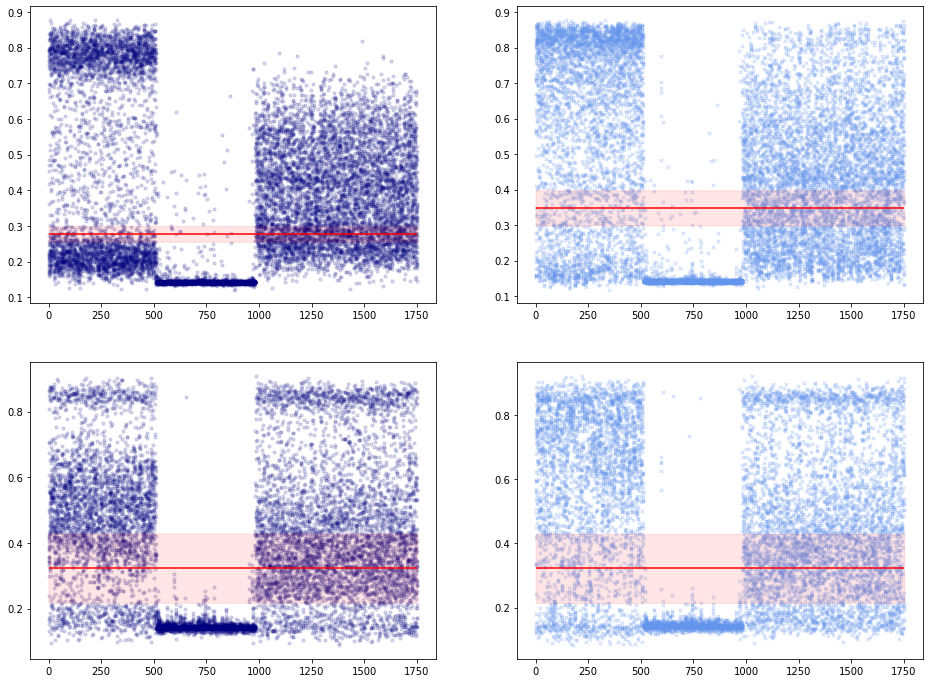

In [178]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

for i in range(9):
    axes[0,0].scatter(np.arange(len(exp_GAT[i])),exp_GAT[i], color='navy', alpha=.15, s=10, marker='o')
    axes[0,1].scatter(np.arange(len(exp_SAGE[i])),exp_SAGE[i], color='cornflowerblue', alpha=.25, s=10, marker='x')

axes[0,0].hlines(Top_GAT[0][:,-1].mean(), 0,  len(exp_GAT[i]), color='red')
axes[0,0].fill_between(np.arange(len(exp_GAT[i])),
                       Top_GAT[0][:,-1].mean()-Top_GAT[0][:,-1].std(), 
                       Top_GAT[0][:,-1].mean()+Top_GAT[0][:,-1].std(), color='red', alpha=0.1)

axes[0,1].hlines(Top_SAGE[0][:,-1].mean(), 0,  len(exp_SAGE[i]), color='red')
axes[0,1].fill_between(np.arange(len(exp_GAT[i])),
                       Top_SAGE[0][:,-1].mean()-Top_SAGE[0][:,-1].std(), 
                       Top_SAGE[0][:,-1].mean()+Top_SAGE[0][:,-1].std(), color='red', alpha=0.1)

for i in range(7):
    axes[1,0].scatter(np.arange(len(exp_GAT_HV[i])),exp_GAT_HV[i], color='navy', alpha=.15, s=10, marker='o')
    axes[1,1].scatter(np.arange(len(exp_SAGE_HV[i])),exp_SAGE_HV[i], color='cornflowerblue',
                      alpha=.25, s=10, marker='x')
    
axes[1,0].hlines(Top_GAT_HV[0][:,-1].mean(), 0,  len(exp_GAT_HV[i]), color='red')
axes[1,0].fill_between(np.arange(len(exp_GAT_HV[i])),
                       Top_GAT_HV[0][:,-1].mean()-Top_GAT_HV[0][:,-1].std(), 
                       Top_GAT_HV[0][:,-1].mean()+Top_GAT_HV[0][:,-1].std(), color='red', alpha=0.1)

axes[1,1].hlines(Top_SAGE_HV[0][:,-1].mean(), 0,  len(exp_SAGE_HV[i]), color='red')
axes[1,1].fill_between(np.arange(len(exp_GAT_HV[i])),
                       Top_SAGE_HV[0][:,-1].mean()-Top_SAGE_HV[0][:,-1].std(), 
                       Top_SAGE_HV[0][:,-1].mean()+Top_SAGE_HV[0][:,-1].std(), color='red', alpha=0.1)

In [248]:
HA_GAT_key = {i:[c.item() for c in Top_GAT[1][i] if c in cand_list] for i in range(len(Top_GAT[1]))}

In [249]:
HA_SAGE_key = {i:[c.item() for c in Top_SAGE[1][i] if c in cand_list] for i in range(len(Top_SAGE[1]))}

In [250]:
HV_GAT_key = {i:[c.item() for c in Top_GAT_HV[1][i] if c in cand_list] for i in range(len(Top_GAT_HV[1]))}

In [251]:
HV_SAGE_key = {i:[c.item() for c in Top_SAGE_HV[1][i] if c in cand_list] for i in range(len(Top_SAGE_HV[1]))}

In [262]:
dic1 = {}
for k, l in HA_GAT_key.items():
    for e in l:
        if not e in dic1:
            dic1[e] = {}
        if not k in dic1[e]:
            dic1[e][k] = 1
        else:
            dic1[e][k] += 1
            
for k, l in HA_SAGE_key.items():
    for e in l:
        if not e in dic1:
            dic1[e] = {}
        if not k in dic1[e]:
            dic1[e][k] = 1
        else:
            dic1[e][k] += 1

In [263]:
dic2 = {}
for k, l in HV_GAT_key.items():
    for e in l:
        if not e in dic2:
            dic2[e] = {}
        if not k in dic2[e]:
            dic2[e][k] = 1
        else:
            dic2[e][k] += 1
            
for k, l in HV_SAGE_key.items():
    for e in l:
        if not e in dic2:
            dic2[e] = {}
        if not k in dic2[e]:
            dic2[e][k] = 1
        else:
            dic2[e][k] += 1

In [264]:
dic1

{1751: {0: 2, 1: 2, 2: 2, 3: 2, 5: 2, 6: 2, 8: 2, 4: 1},
 968: {0: 1, 5: 1},
 842: {0: 2},
 518: {0: 1},
 1750: {0: 2, 2: 2, 3: 2, 4: 2, 6: 2, 8: 2, 5: 1, 7: 1},
 605: {0: 1, 3: 2},
 1752: {0: 1, 4: 1, 6: 1, 7: 2},
 638: {0: 1},
 584: {0: 1, 3: 1},
 954: {1: 1, 8: 1},
 969: {1: 1, 4: 2, 8: 2},
 594: {1: 2, 4: 2, 0: 1, 3: 1, 5: 1, 6: 1, 8: 1},
 742: {1: 2},
 519: {1: 2},
 733: {1: 1},
 788: {1: 1, 4: 1},
 836: {2: 2},
 738: {2: 2},
 629: {2: 2},
 546: {2: 2},
 737: {2: 2},
 782: {2: 2},
 587: {2: 1},
 971: {3: 2},
 973: {3: 2, 6: 1, 7: 2, 2: 1},
 846: {3: 2},
 649: {3: 1},
 719: {4: 2},
 709: {4: 2},
 564: {4: 2, 8: 1},
 762: {4: 1},
 686: {4: 1},
 745: {5: 2},
 606: {5: 2},
 752: {5: 1},
 647: {5: 2},
 624: {5: 1},
 623: {5: 1},
 512: {6: 2, 7: 1, 0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 8: 1},
 514: {7: 1},
 513: {7: 2, 0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 8: 1},
 652: {7: 1},
 863: {8: 2},
 823: {8: 2},
 583: {8: 1},
 715: {8: 2}}

In [265]:
dic2

{1751: {0: 2, 1: 2, 2: 2, 3: 2, 4: 1},
 969: {2: 1, 5: 1},
 954: {2: 1, 5: 1},
 594: {2: 2, 0: 1, 1: 1, 3: 1, 4: 1, 5: 1},
 1752: {5: 2, 6: 2},
 652: {6: 2},
 1750: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1},
 512: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1},
 513: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1},
 519: {2: 1, 5: 1},
 781: {5: 1},
 729: {5: 1},
 604: {6: 1},
 703: {6: 1}}

In [229]:
HA_GAT_key

{0: [1751, 968, 842, 518, 1750, 605, 1752, 638, 584],
 1: [954, 969, 594, 1751, 742, 519, 733, 788],
 2: [836, 738, 629, 546, 1751, 737, 782, 587, 1750],
 3: [971, 973, 605, 846, 1750, 649, 1751, 584],
 4: [969, 719, 709, 564, 594, 1752, 788, 1750, 762, 686],
 5: [968, 1751, 745, 606, 752, 647, 624, 623],
 6: [1751, 1752, 973, 1750, 512],
 7: [973, 512, 514, 513, 1752, 652],
 8: [863, 823, 1750, 583, 715, 969, 954, 1751]}

In [230]:
HA_SAGE_key

{0: [1750, 594, 513, 1751, 512, 842],
 1: [594, 1751, 512, 513, 519, 742],
 2: [973, 513, 512, 836, 629, 1751, 546, 738, 737, 1750, 782],
 3: [1750, 1751, 971, 973, 605, 512, 594, 846, 513],
 4: [1750, 969, 513, 512, 594, 1751, 719, 564, 709],
 5: [1751, 1750, 513, 512, 594, 745, 606, 647],
 6: [1751, 1750, 512, 513, 594],
 7: [973, 1752, 1750, 513],
 8: [513, 512, 863, 1751, 1750, 594, 969, 823, 564, 715]}

In [231]:
HV_GAT_key

{0: [1751],
 1: [1751],
 2: [969, 954, 594, 1751],
 3: [1751],
 4: [],
 5: [1752],
 6: [1752, 652]}

In [232]:
HV_SAGE_key

{0: [1751, 1750, 512, 594, 513],
 1: [1751, 594, 513, 512, 1750],
 2: [594, 1751, 513, 512, 1750, 519],
 3: [1751, 594, 1750, 513, 512],
 4: [1751, 594, 1750, 513, 512],
 5: [1750, 513, 969, 781, 512, 1752, 729, 519, 594, 954],
 6: [1750, 1752, 604, 652, 703, 513]}

In [233]:
Top_GAT = exp_GAT.topk(20)
Top_SAGE = exp_SAGE.topk(20)

In [234]:
Top_GAT_HV = exp_GAT_HV.topk(20)
Top_SAGE_HV = exp_SAGE_HV.topk(20)

In [235]:
HA_GAT_key = {i:[c.item() for c in Top_GAT[1][i]] for i in range(len(Top_GAT[1]))}

In [236]:
HA_SAGE_key = {i:[c.item() for c in Top_SAGE[1][i]] for i in range(len(Top_SAGE[1]))}

In [237]:
HV_GAT_key = {i:[c.item() for c in Top_GAT_HV[1][i]] for i in range(len(Top_GAT_HV[1]))}

In [238]:
HV_SAGE_key = {i:[c.item() for c in Top_SAGE_HV[1][i]] for i in range(len(Top_SAGE_HV[1]))}

In [240]:
dic1 = {}
for k, l in HA_GAT_key.items():
    for e in l:
        if not e in dic1:
            dic1[e] = {}
        if not k in dic1[e]:
            dic1[e][k] = 1
        else:
            dic1[e][k] += 1
            
for k, l in HA_SAGE_key.items():
    for e in l:
        if not e in dic1:
            dic1[e] = {}
        if not k in dic1[e]:
            dic1[e][k] = 1
        else:
            dic1[e][k] += 1

In [466]:
Places = pd.read_csv('dataset/categories_places365.txt', header=None, sep=' ')
Places['big'] = Places[0].apply(lambda x: x.split('/')[2] if len(x.split('/'))==3 else x.split('/')[2]+x.split('/')[3])
Places['small'] = Places[0].apply(lambda x: x.split('/')[-1])
Places['hier'] = Places[0].apply(lambda x: len(x.split('/')))
#Places['place'] = Places.apply(lambda x: x['big'] if x['hier']==3 else x['big']+'_'+x['small'])
Places

,0,1,big,small,hier
0,/a/airfield,0,airfield,airfield,3
1,/a/airplane_cabin,1,airplane_cabin,airplane_cabin,3
2,/a/airport_terminal,2,airport_terminal,airport_terminal,3
3,/a/alcove,3,alcove,alcove,3
4,/a/alley,4,alley,alley,3
...,...,...,...,...,...
360,/w/wind_farm,360,wind_farm,wind_farm,3
361,/w/windmill,361,windmill,windmill,3
362,/y/yard,362,yard,yard,3
363,/y/youth_hostel,363,youth_hostel,youth_hostel,3


In [462]:
Places['hier'].describe()

count    365.000000
mean       3.205479
std        0.404606
min        3.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: hier, dtype: float64

In [467]:
len(Places['big'].unique())

365

In [273]:
Attributes = pd.read_csv('dataset/labels_sunattribute.txt', header=None)
Attributes

,0
0,boating
1,driving
2,biking
3,transporting
4,sunbathing
...,...
97,symmetrical
98,cluttered space
99,scary
100,soothing


In [468]:
dic0 = {}
dic0[512] = 'FACE_Number'
dic0[513] = 'FACE_Confidence'
dic0[514] = 'FACE_Proportion'
for i in range(len(Places)):
    dic0[i+515] = 'SCE_'+Places['big'].iloc[i]
for i in range(len(Attributes)):
    dic0[i+880] = 'SUN_'+Attributes[0].iloc[i]
dic0[1750] = 'LANG_English'
dic0[1751] = 'LANG_Local'
dic0[1752] = 'LANG_Other'

In [469]:
dic0

{512: 'FACE_Number',
 513: 'FACE_Confidence',
 514: 'FACE_Proportion',
 515: 'SCE_airfield',
 516: 'SCE_airplane_cabin',
 517: 'SCE_airport_terminal',
 518: 'SCE_alcove',
 519: 'SCE_alley',
 520: 'SCE_amphitheater',
 521: 'SCE_amusement_arcade',
 522: 'SCE_amusement_park',
 523: 'SCE_apartment_buildingoutdoor',
 524: 'SCE_aquarium',
 525: 'SCE_aqueduct',
 526: 'SCE_arcade',
 527: 'SCE_arch',
 528: 'SCE_archaelogical_excavation',
 529: 'SCE_archive',
 530: 'SCE_arenahockey',
 531: 'SCE_arenaperformance',
 532: 'SCE_arenarodeo',
 533: 'SCE_army_base',
 534: 'SCE_art_gallery',
 535: 'SCE_art_school',
 536: 'SCE_art_studio',
 537: 'SCE_artists_loft',
 538: 'SCE_assembly_line',
 539: 'SCE_athletic_fieldoutdoor',
 540: 'SCE_atriumpublic',
 541: 'SCE_attic',
 542: 'SCE_auditorium',
 543: 'SCE_auto_factory',
 544: 'SCE_auto_showroom',
 545: 'SCE_badlands',
 546: 'SCE_bakeryshop',
 547: 'SCE_balconyexterior',
 548: 'SCE_balconyinterior',
 549: 'SCE_ball_pit',
 550: 'SCE_ballroom',
 551: 'SCE_ba

In [517]:
classes = ['Criterion i', 'Criterion ii', 'Criterion iii', 'Criterion iv', 'Criterion v', 'Criterion vi', 
              'Criterion vii', 'Criterion viii', 'Criterion ix', 'Criterion x', 'Others']
categories = ['Building Elements',
 'Urban Form Elements',
 'Gastronomy',
 'Interior Scenery',
 'Natural Features and Landscape Scenery',
 'Monuments and Buildings',
 'Peoples Activity and Association',
 'Artifact Products',
 'Urban Scenery']

In [283]:
dic_HA = {i:categories[i] for i in range(len(categories))}

In [284]:
dic_HA 

{0: 'Building Elements',
 1: 'Urban Form Elements',
 2: 'Gastronomy',
 3: 'Interior Scenery',
 4: 'Natural Features and Landscape Scenery',
 5: 'Monuments and Buildings',
 6: 'Peoples Activity and Association',
 7: 'Artifact Products',
 8: 'Urban Scenery'}

In [518]:
dic_HV = {i:classes[i] for i in range(len(classes))}

In [519]:
dic_HV

{0: 'Criterion i',
 1: 'Criterion ii',
 2: 'Criterion iii',
 3: 'Criterion iv',
 4: 'Criterion v',
 5: 'Criterion vi',
 6: 'Criterion vii',
 7: 'Criterion viii',
 8: 'Criterion ix',
 9: 'Criterion x',
 10: 'Others'}

In [296]:
dic_1_re = {dic0[k]:{dic_HA[i]: v[i] for i in v} for k,v in dic1.items()}

In [298]:
dic_2_re = {dic0[k]:{dic_HV[i]: v[i] for i in v} for k,v in dic2.items()}

In [297]:
dic_1_re 

{'LANG_Local': {'Building Elements': 2,
  'Urban Form Elements': 2,
  'Gastronomy': 2,
  'Interior Scenery': 2,
  'Monuments and Buildings': 2,
  'Peoples Activity and Association': 2,
  'Urban Scenery': 2,
  'Natural Features and Landscape Scenery': 1},
 'SUN_man-made': {'Building Elements': 1, 'Monuments and Buildings': 1},
 'SCE_outdoor': {'Monuments and Buildings': 1},
 'SCE_alcove': {'Building Elements': 1},
 'LANG_English': {'Building Elements': 2,
  'Gastronomy': 2,
  'Interior Scenery': 2,
  'Natural Features and Landscape Scenery': 2,
  'Peoples Activity and Association': 2,
  'Urban Scenery': 2,
  'Monuments and Buildings': 1,
  'Artifact Products': 1},
 'SCE_indoor': {'Gastronomy': 2},
 'LANG_Other': {'Building Elements': 1,
  'Natural Features and Landscape Scenery': 1,
  'Peoples Activity and Association': 1,
  'Artifact Products': 2},
 'SCE_burial_chamber': {'Building Elements': 1, 'Interior Scenery': 1},
 'SUN_natural light': {'Urban Form Elements': 1, 'Urban Scenery': 1

In [299]:
dic_2_re

{'LANG_Local': {'Criterion i': 2,
  'Criterion ii': 2,
  'Criterion iii': 2,
  'Criterion iv': 2,
  'Criterion vi': 1},
 'SUN_open area': {'Criterion iii': 1, 'Criterion vii': 1},
 'SUN_natural light': {'Criterion iii': 1, 'Criterion vii': 1},
 'SCE_urban': {'Criterion iii': 2,
  'Criterion i': 1,
  'Criterion ii': 1,
  'Criterion iv': 1,
  'Criterion vi': 1,
  'Criterion vii': 1},
 'LANG_Other': {'Criterion vii': 2, 'Criterion x': 2},
 'SCE_fabric_store': {'Criterion x': 2},
 'LANG_English': {'Criterion i': 1,
  'Criterion ii': 1,
  'Criterion iii': 1,
  'Criterion iv': 1,
  'Criterion vi': 1,
  'Criterion vii': 1,
  'Criterion x': 1},
 'FACE_Number': {'Criterion i': 1,
  'Criterion ii': 1,
  'Criterion iii': 1,
  'Criterion iv': 1,
  'Criterion vi': 1,
  'Criterion vii': 1},
 'FACE_Confidence': {'Criterion i': 1,
  'Criterion ii': 1,
  'Criterion iii': 1,
  'Criterion iv': 1,
  'Criterion vi': 1,
  'Criterion vii': 1,
  'Criterion x': 1},
 'SCE_alley': {'Criterion iii': 1, 'Criterion

In [549]:
len(dic0)

473